- ## <u><span style="color:teal;"> Data Analysis : </span></u>

- ### <u><span style="color:teal;"> Import Libraries: </span></u>

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
im
import warnings
warnings.filterwarnings("ignore")

- ### <u><span style="color:teal;"> Look at data: </span></u>

In [7]:
data = pd.read_csv("IEEE_competition.csv")

In [9]:
data.head()

,ID,Person_Story,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalHealth,MentalHealth,PhysicalActivity,DiffWalking,TImEOFSLeeP,Asthma,KidneyDisease,HeartDisease
0,0,"Once upon a time, there was a Female person of...",Middle,29.29,Absence,Absence,NaN,0.0,5.0,Yes,NaN,6.0,No,No,Absence
1,1,"Once upon a time, there was a Female person of...",Middle,33.09,Absence,Absence,No,0.0,20.0,Yes,No,9.0,No,No,Absence
2,2,"Once upon a time, there was a Male person of O...",Younger,28.19,Absence,Absence,No,0.0,0.0,Yes,No,7.0,No,No,Absence
3,3,"Once upon a time, there was a Male person of W...",Middle,36.62,Absence,Absence,No,0.0,0.0,No,No,6.0,No,No,Absence
4,4,"Once upon a time, there was a Male person of W...",Middle,33.38,Absence,Absence,Yes,12.0,20.0,No,No,4.0,Yes,No,Absence


In [10]:
data.dtypes

ID                    int64
Person_Story         object
Age_Category         object
BMI                 float64
DiabeticORABS        object
SkinCancerORABS      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
PhysicalActivity     object
DiffWalking          object
TImEOFSLeeP         float64
Asthma               object
KidneyDisease        object
HeartDisease         object
dtype: object

In [12]:
data.shape

(207862, 15)

#### <span style="color:teal;"> Data Set have `15` columns & `207862` rows.</span>

In [13]:
data.columns

Index(['ID', 'Person_Story', 'Age_Category', 'BMI', 'DiabeticORABS',
       'SkinCancerORABS', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'PhysicalActivity', 'DiffWalking', 'TImEOFSLeeP', 'Asthma',
       'KidneyDisease', 'HeartDisease'],
      dtype='object')

In [15]:
data.describe()

,ID,BMI,PhysicalHealth,MentalHealth,TImEOFSLeeP
count,207862.000000,207552.000000,207552.000000,207552.000000,207552.000000
mean,103930.500000,28.339159,3.375053,3.897857,7.101006
std,60004.735165,6.351421,7.954392,7.957564,1.437473
min,0.000000,12.020000,0.000000,0.000000,1.000000
25%,51965.250000,24.030000,0.000000,0.000000,6.000000
50%,103930.500000,27.340000,0.000000,0.000000,7.000000
75%,155895.750000,31.460000,2.000000,3.000000,8.000000
max,207861.000000,94.850000,30.000000,30.000000,24.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207862 entries, 0 to 207861
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                207862 non-null  int64  
 1   Person_Story      207552 non-null  object 
 2   Age_Category      207552 non-null  object 
 3   BMI               207552 non-null  float64
 4   DiabeticORABS     207552 non-null  object 
 5   SkinCancerORABS   207552 non-null  object 
 6   Stroke            147832 non-null  object 
 7   PhysicalHealth    207552 non-null  float64
 8   MentalHealth      207552 non-null  float64
 9   PhysicalActivity  159410 non-null  object 
 10  DiffWalking       153948 non-null  object 
 11  TImEOFSLeeP       207552 non-null  float64
 12  Asthma            207552 non-null  object 
 13  KidneyDisease     207552 non-null  object 
 14  HeartDisease      207552 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 23.8+ MB


 #### <span style="color:teal;"> Data Set data types are correct, but there are many `NAN` values.</span>

In [19]:
pd.isna(data).sum()[pd.isna(data).sum() > 0]

Person_Story          310
Age_Category          310
BMI                   310
DiabeticORABS         310
SkinCancerORABS       310
Stroke              60030
PhysicalHealth        310
MentalHealth          310
PhysicalActivity    48452
DiffWalking         53914
TImEOFSLeeP           310
Asthma                310
KidneyDisease         310
HeartDisease          310
dtype: int64

#### <span style="color:teal;"> It clear that there are many `NAN` so how can we deal with?</span>

In [26]:
data.isna().all(axis=1).sum()

0

#### <span style="color:teal;"> `NAN` values are not in the same raws.</span>

In [29]:
## Null values in categorical variables

data.Person_Story = data.Person_Story.fillna(data.Person_Story.mode().iloc[0])
data.Age_Category = data.Age_Category.fillna(data.Age_Category.mode().iloc[0])
data.DiabeticORABS  = data.DiabeticORABS .fillna(data.DiabeticORABS .mode().iloc[0])
data.SkinCancerORABS = data.Person_Story.fillna(data.SkinCancerORABS.mode().iloc[0])
data.Stroke = data.Stroke.fillna(data.Stroke.mode().iloc[0])
data.PhysicalActivity = data.PhysicalActivity.fillna(data.PhysicalActivity.mode().iloc[0])
data.DiffWalking = data.DiffWalking.fillna(data.DiffWalking.mode().iloc[0])
data.Asthma  = data.Asthma.fillna(data.Asthma .mode().iloc[0])
data.KidneyDisease = data.KidneyDisease.fillna(data.KidneyDisease.mode().iloc[0])
data.HeartDisease = data.HeartDisease.fillna(data.HeartDisease.mode().iloc[0])

In [30]:
pd.isna(data).sum()[pd.isna(data).sum() > 0]

BMI               310
PhysicalHealth    310
MentalHealth      310
TImEOFSLeeP       310
dtype: int64

#### <span style="color:teal;"> Now,There are no categorical `NAN` values ,but what about numeric one.</span>

In [47]:
data['TImEOFSLeeP'].describe()

count    207552.000000
mean          7.101006
std           1.437473
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: TImEOFSLeeP, dtype: float64

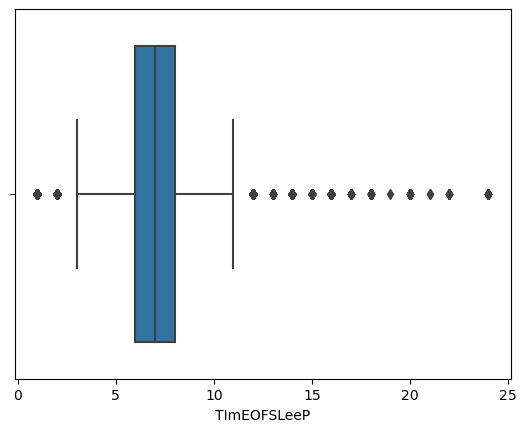

In [34]:
data_num_sleepTime=data["TImEOFSLeeP"]
sns.boxplot(x=data_num_sleepTime);

In [36]:
Q1=data_num_sleepTime.quantile(0.25)
Q3=data_num_sleepTime.quantile(0.75)
IQR=Q3-Q1
print("First Quartile: ",Q1)
print("Third Quartile: ",Q3)
print("Interquartile: ",IQR)

First Quartile:  6.0
Third Quartile:  8.0
Interquartile:  2.0


In [ ]:
finding Outlier Values

In [37]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("Lower Limit: ",lower_limit)
print("Upper Limi: ",upper_limit)

Lower Limit:  3.0
Upper Limi:  11.0


In [40]:
Sleep_Outliers = ((data_num_sleepTime<lower_limit) | (data_num_sleepTime>upper_limit))
Sleep_Outliers.sum()

3007

In [39]:
data_num_sleepTime.mean()

7.101006012950971